# Библиотеки

Импортируем необходимые библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Датасет

Загружаем данные.

In [ ]:
df = pd.read_csv("dataset.csv")

Теперь отобразим данные.

In [ ]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Данные загружены (Датасет содержит 114000 записей и 21 столбец).

Теперь перейдём к первичному анализу.





# Первичный анализ

Сначала изучим структуру и типы данных, посмотрим на наличие пропусков, а также определим ключевые метрики.

После этого приступим к визуализации и EDA.

Отобразим наши столбцы.

In [ ]:
print("\nСтолбцы:")
print(df.info())


Столбцы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness  



> Значения столбцов:


1.   track_id - идентификатор трека (уникальный код для каждой песни)

2.   artists - исполнители

3.   album_name - название альбома, в котором содержится трек

4.   track_name - название трека

5.   popularity (наша целевая переменная) - популярность трека (измеряется от 0 до 100)

6.   duration_ms - длительность трека в миллисекундах

7.   explicit - содержит ли трек ненормативную лексику (True/False)

8.   danceability - танцевальность трека (0-1), оценивает, насколько трек подходит для танцев

9.   energy - уровень энергии трека (0-1), отражает интенсивность трека

10.  key - тональность трека (0-11), где каждая цифра соответствует определенной ноте

11.  loudness - громкость трека (дБ), средний уровень звука

12.  mode - лад (1 - мажор, 2 - минор)

13.  speechiness - разговорность трека (0-1), оценивает долю речевых фрагментов

14.  acousticness - акустичность трека (0-1), оценивает вероятность того, что трек полностью акустический

15.  instrumentalness - инструментальность трека (0-1), оценивает вероятность отсутствия вокала

16.  liveness - живость трека (0-1), оценивает вероятность того, что запись была сделана вживую

17.  valence - эмоциональность трека (1 - радостный, 0 - грустный)

18.  tempo - темп трека (удары в минуту)

19.  time_signature - размер такта

20.  track_genre - жанр трека


> Типы данных:

1.   Целочисленные (int64): popularity, duration_ms, time_signature, key, node.
2.   Вещественные (float64): danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo.
3.   Логические (bool): explicit.
4.   Объектные (object): track_id, artists, album_name, track_name, track_genre.

Для удобства анализа, предлагаю сразу удалить столбец Unnamed: 0, так как это дубликат индекса, который никак не пригодится в работе.

А также столбец track_id, который также не принесет пользы для анализа и дальнейшей работы.

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'track_id'])

# Убедимся, что столбцы удалились
print("\nСтолбцы:")
print(df.info())


Столбцы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo     

Отлично, мы удалили ненужные столбцы, идём дальше.

Теперь посмотрим столбцы на наличие пропусков.

In [ ]:
print("\nКоличество пропусков:")
print(df.isnull().sum())


Количество пропусков:
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


> Все эти 3 столбца имеют по одному пропущенному значению:

1.   artists
2.   album_name
3.   track_name

Пропусков всего 3, а данных у нас 114000, поэтому если мы их просто удалим, то на результате это особо не скажется. Пока не будем удалять, сделаем это на этапе предобработки данных.

Теперь посмотрим столбцы на наличие уникальных значений.

In [ ]:
unique_values = df.nunique()

print("Уникальные значения:")
print(unique_values)

Уникальные значения:
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64


Вывод:

1. Столбцы artists, album_name и track_name содержат слишком много уникальных значений, которые, вероятно, не связаны напрямую с популярностью. Поэтому не будем использовать при создании моделей.

2. duration_ms и tempo имеют значения (50697) (45653) соответственно. Это числовые признаки, а их высокая уникальность указывает на важность сохранения. Они могут содержать полезную информацию.

3. danceability (1174), energy (2083), speechiness (1489), acousticness (5061), instrumentalness (5346), liveness (1722), valence (1790) имеют умеренную уникальность, но тем неменее - это важные параметры музыкальной композиции.

4. track_genre содержит 114 уникальных значений, что также далает его пригодным параметром для работы.

> Ключевые метрики:

1.   popularity - популярность трека. Это наша целевая переменная, которую мы хотим предсказать. От понимания этой метрики зависят подходы к созданию модели.
2.   duration_ms - длительность трека. Её можно считать ключевой метрикой, так как она влияет на восприятие трека и может оказывать влияние на популярность, особенно в контексте потребительских предпочтений и алгоритмов музыкальных сервисов.
3.   energy - энергичность трека. Эта метрика оценивает активность трека, что может быть часто связано с его восприятием слушателями. Тем более, энергичные треки, как правило, ассоциируются с определенными жанрами и могут быть более популярны.
4.   track_genre - жанр трека. Основной параметр музыкальной композиции, который закладывается еще на этапе создания музыки. Ведь, когда люди выбирают, какую музыку хотят послушать, то они в первую очередь обращают внимание именно на жанр.

Мы закончили с первичным анализом, изучили столбцы, их типы данных, выявили пропуски и уникальные значения. Также определились с ключевыми метриками.



> Дальнейшие действия:

Проведем исследование данных:
Построим графики распределения по ключевым метрикам (popularity, danceability, energy, и т.д.).
Проанализируем, как разные жанры или другие характеристики коррелируют с популярностью.
Попробуем выделить важные признаки.



# EDA и РЕСЕРЧ-АНАЛИЗ

Построиим графики для числовых признаков.

Изучим распределение признаков, чтобы оценить их диапазоны и выявить потенциальные аномалии.

**1. Для начала посмотрим распределение популярности (popularity) по трекам.**

> Это будет полезно для общего представления того, как распределена популярность треков в нашем датасете.

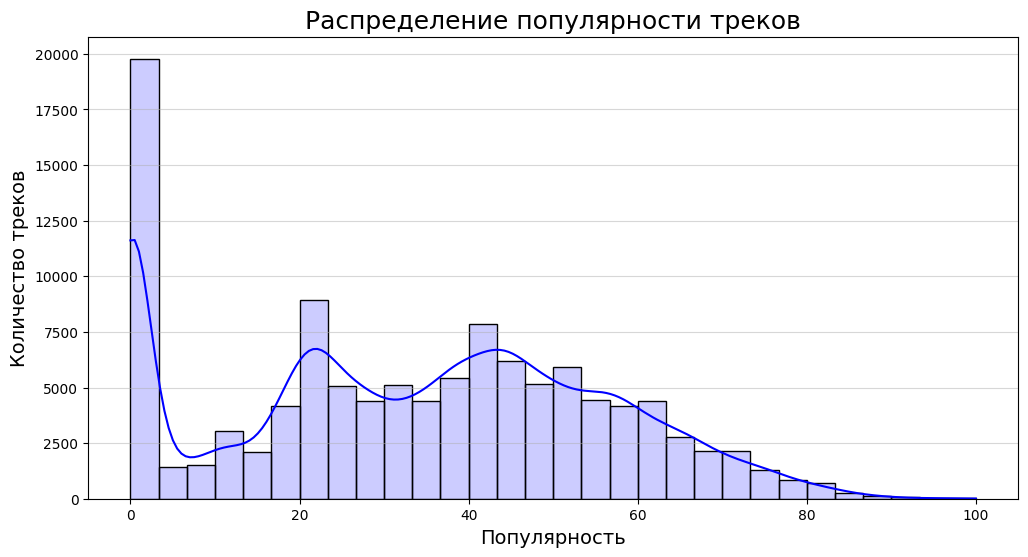

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue', alpha=0.2)
plt.title('Распределение популярности треков', fontsize=18)
plt.xlabel('Популярность', fontsize=14)
plt.ylabel('Количество треков', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.show()

> Наблюдения:

График скошен влево, что может говорить о неравномерности распределения популярности. Есть пики в распределении, что может указывать на кластеризацию треков по популярности (треки с высокой и низкой популярностью имеют разные причины попадания в эти группы). Наибольшее количество треков имеет низкую популярность. Высокая популярность (больше 70) встречается реже.

> Выводы:

Распределение популярности показывает, что большинство треков либо малопопулярны, либо имеют среднюю популярность. А популярность больше 70 имеет небольшое количество треков. Это соответствует реальной ситуации, ведь не все треки становятся хитами.

**2. Зависимость популярности (popularity) от танцевальности трека (danceability).**

> Моё предположение заключается в том, что танцевальная музыка нравится людям больше, следовательно, она более популярная, проверим, так ли это.

<ipython-input-9-a9a20c796baf>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  danceability_popularity = df.groupby('danceability_category')['popularity'].mean().reset_index()
<ipython-input-9-a9a20c796baf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=danceability_popularity, x='danceability_category', y='popularity', palette='coolwarm')


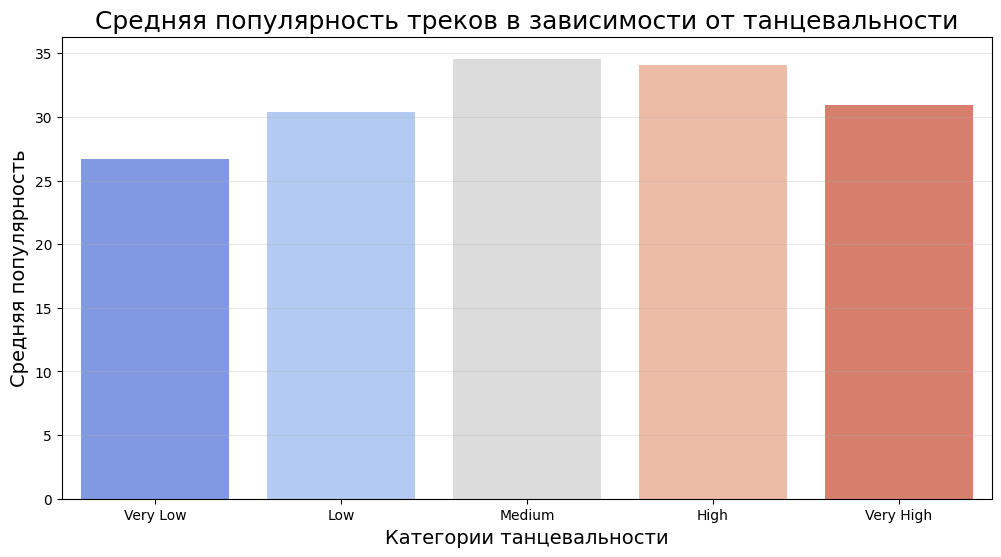

In [ ]:
# Разделим танцевальность на категории для лучшего восприятия
df['danceability_category'] = pd.cut(df['danceability'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Средння популярность для каждой категории
danceability_popularity = df.groupby('danceability_category')['popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=danceability_popularity, x='danceability_category', y='popularity', palette='coolwarm')
plt.title('Средняя популярность треков в зависимости от танцевальности', fontsize=18)
plt.xlabel('Категории танцевальности', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()

> Наблюдения:

По графику видно, что наибольшая средняя популярность у танцевальности категории medium и high (≈34). Наименьшую среднюю популярность имеет танцевальность very low (≈27).

> Выводы:

Можно сделать вывод, что танцевальность оказывает влияние на популярность трека: более танцевальные треки, вероятно, становятся более популярными. Но если смотреть на общую картину, то зависимость довольно слабая. Поэтому моё предположение было верно, но оно не настолько ценно для нашей работы.


**3. Теперь посмотрим на зависимость популярности (popularity) от энергичности трека (energy).**

> Если в случае с танцевальностью, популярность имеет не такую сильную связь, то с энергичностью трека стоит это проверить, ведь энергичная музыка, в теории, может нравится большему числу людей, а значит может влиять на популярность. Но с другой стороны посмотрим, может ли музыка с низкой энегичностью быть популярной.

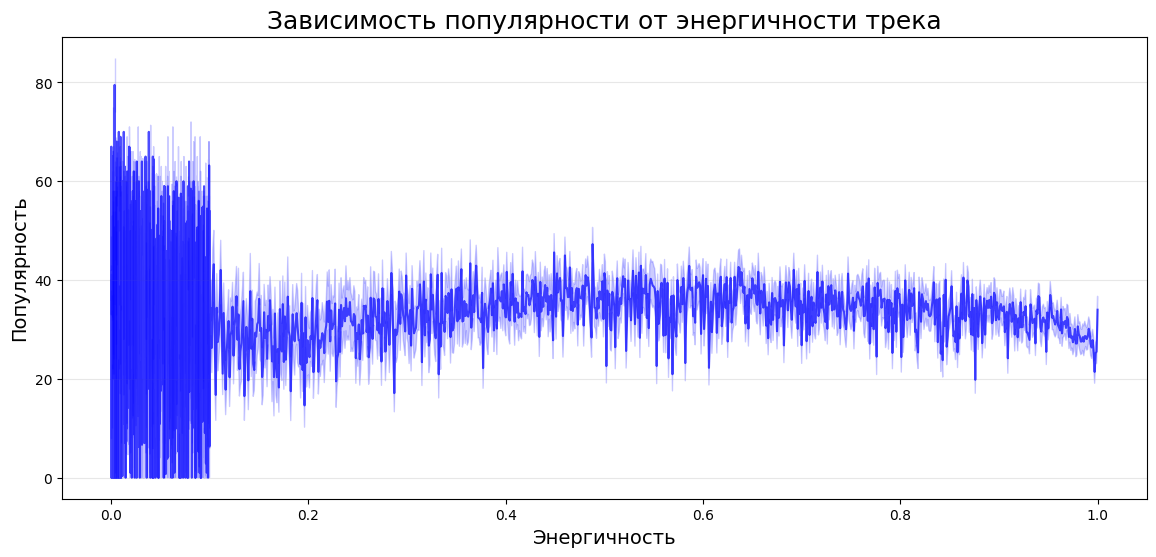

In [ ]:
df = df.sort_values('energy')
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='energy', y='popularity', color='blue', alpha=0.7)
plt.title('Зависимость популярности от энергичности трека', fontsize=18)
plt.xlabel('Энергичность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()

> Наблюдения:

По графику заметен тренд на увеличение популярности в диапазоне 0.3-0.7. Также видим шум в данных при низкой энергичности диапазоне от 0 до 0.1. Виден небольшой спад популярности в диапазоне энергичности 0.9-1.

> Выводы:

 Можно сделать вывод о том, что при средних и высоких значениях энергичности трек более вероятно может стать популярным. А судя по разбросу в начале графика, я подтвердил свою теорию, что не всегда энергичность влияет на популярность, т.к. это может быть связано с спокойными жанрами треков (ambient, lo-fi и т.д.), которые также нравятся людям.

**4. Посмотрим на зависимость популярности (popularity) от продолжительности трека (duration_ms).**

> Также предлагаю перевести длительность из миллисекунд в минуты, т.к. это стандарт длительности треков, к которому все привыкли.

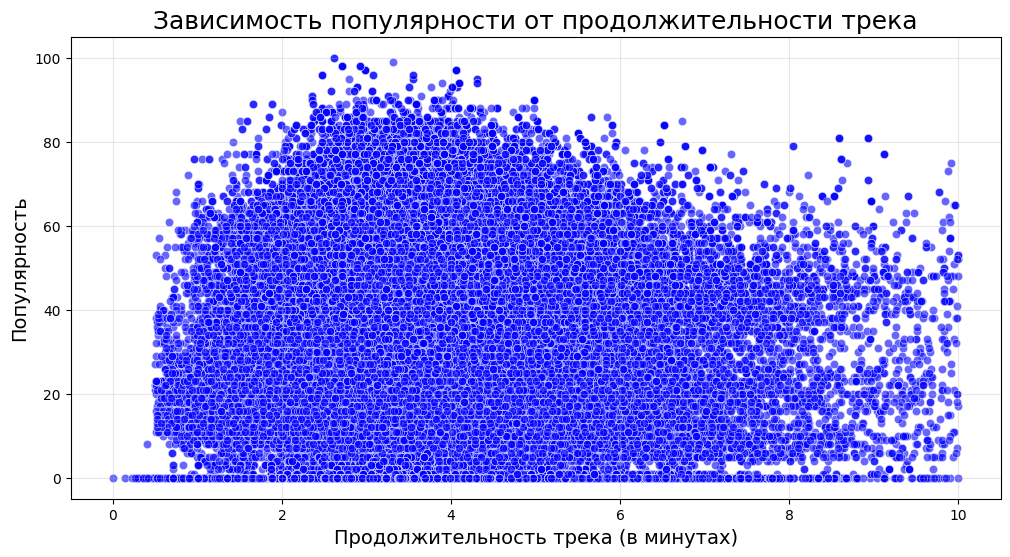

In [ ]:
# Преобразовываем длительность в минуты
df['duration_min'] = df['duration_ms'] / 60000

# Разделим продолжительность на категории (шаг 1 минута)
df['duration_category'] = pd.cut(df['duration_min'], bins=range(0, 11, 1), labels=[f'{i}-{i+1} min' for i in range(0, 10)])

# Отобразим треки до 10 минут, т.к. это наиболее реальные значения для музыкальных треков
df_filtered = df[df['duration_min'] <= 10]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='duration_min', y='popularity', color='blue', alpha=0.6)
plt.title('Зависимость популярности от продолжительности трека', fontsize=18)
plt.xlabel('Продолжительность трека (в минутах)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.show()

> Наблюдения:

Большинство треков сосредоточено в диапазоне от 1 до 6 минут, что подтверждает общепринятую длину треков. Наибольшая концентрация высоко популярных треков наблюдается в диапазоне от 2.5 до 4.5 минут. Длинные треки (ближе к 10 минутам) имеют как очень низкую, так и умеренную популярность, но редко достигают пиковых значений. Треки продолжительностью менее 1 минуты имеют низкую популярность.

> Выводы:

 Треки с длиной 2.5–4.5 минуты чаще становятся популярными. Это может быть связано с тем, что такая длина лучше подходит для коммерческого успеха трека на стриминговых площадках, ну или с тем, что это наиболее комфортная длительность для слушателя. А треки продолжительностью менее 1 минут или более 5 минут чаще менее популярны, вероятно, из-за неудобства для потребителей: слишком короткими треками могут быть так называемые "прелюдии" в альбомах или джинглы различных шоу, которые малопопулярны, а длинные треки сложно воспринимаются, ведь сейчас эра клипового восприятия информации, особенно у молодежи, которая и является целевой аудиторией стриминговых сервисов.

**5. Предлагаю посмотреть как популярность (popularity) распределяется по жанрам треков (track_genre).**

> Т.к. на этапе первичного анализа мы зафиксировали 114 уникальных значений у track_genre, то посмотреть их взаимосвязь с популярностью - особенно важно.

<ipython-input-12-3b8d7147fba1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='coolwarm')


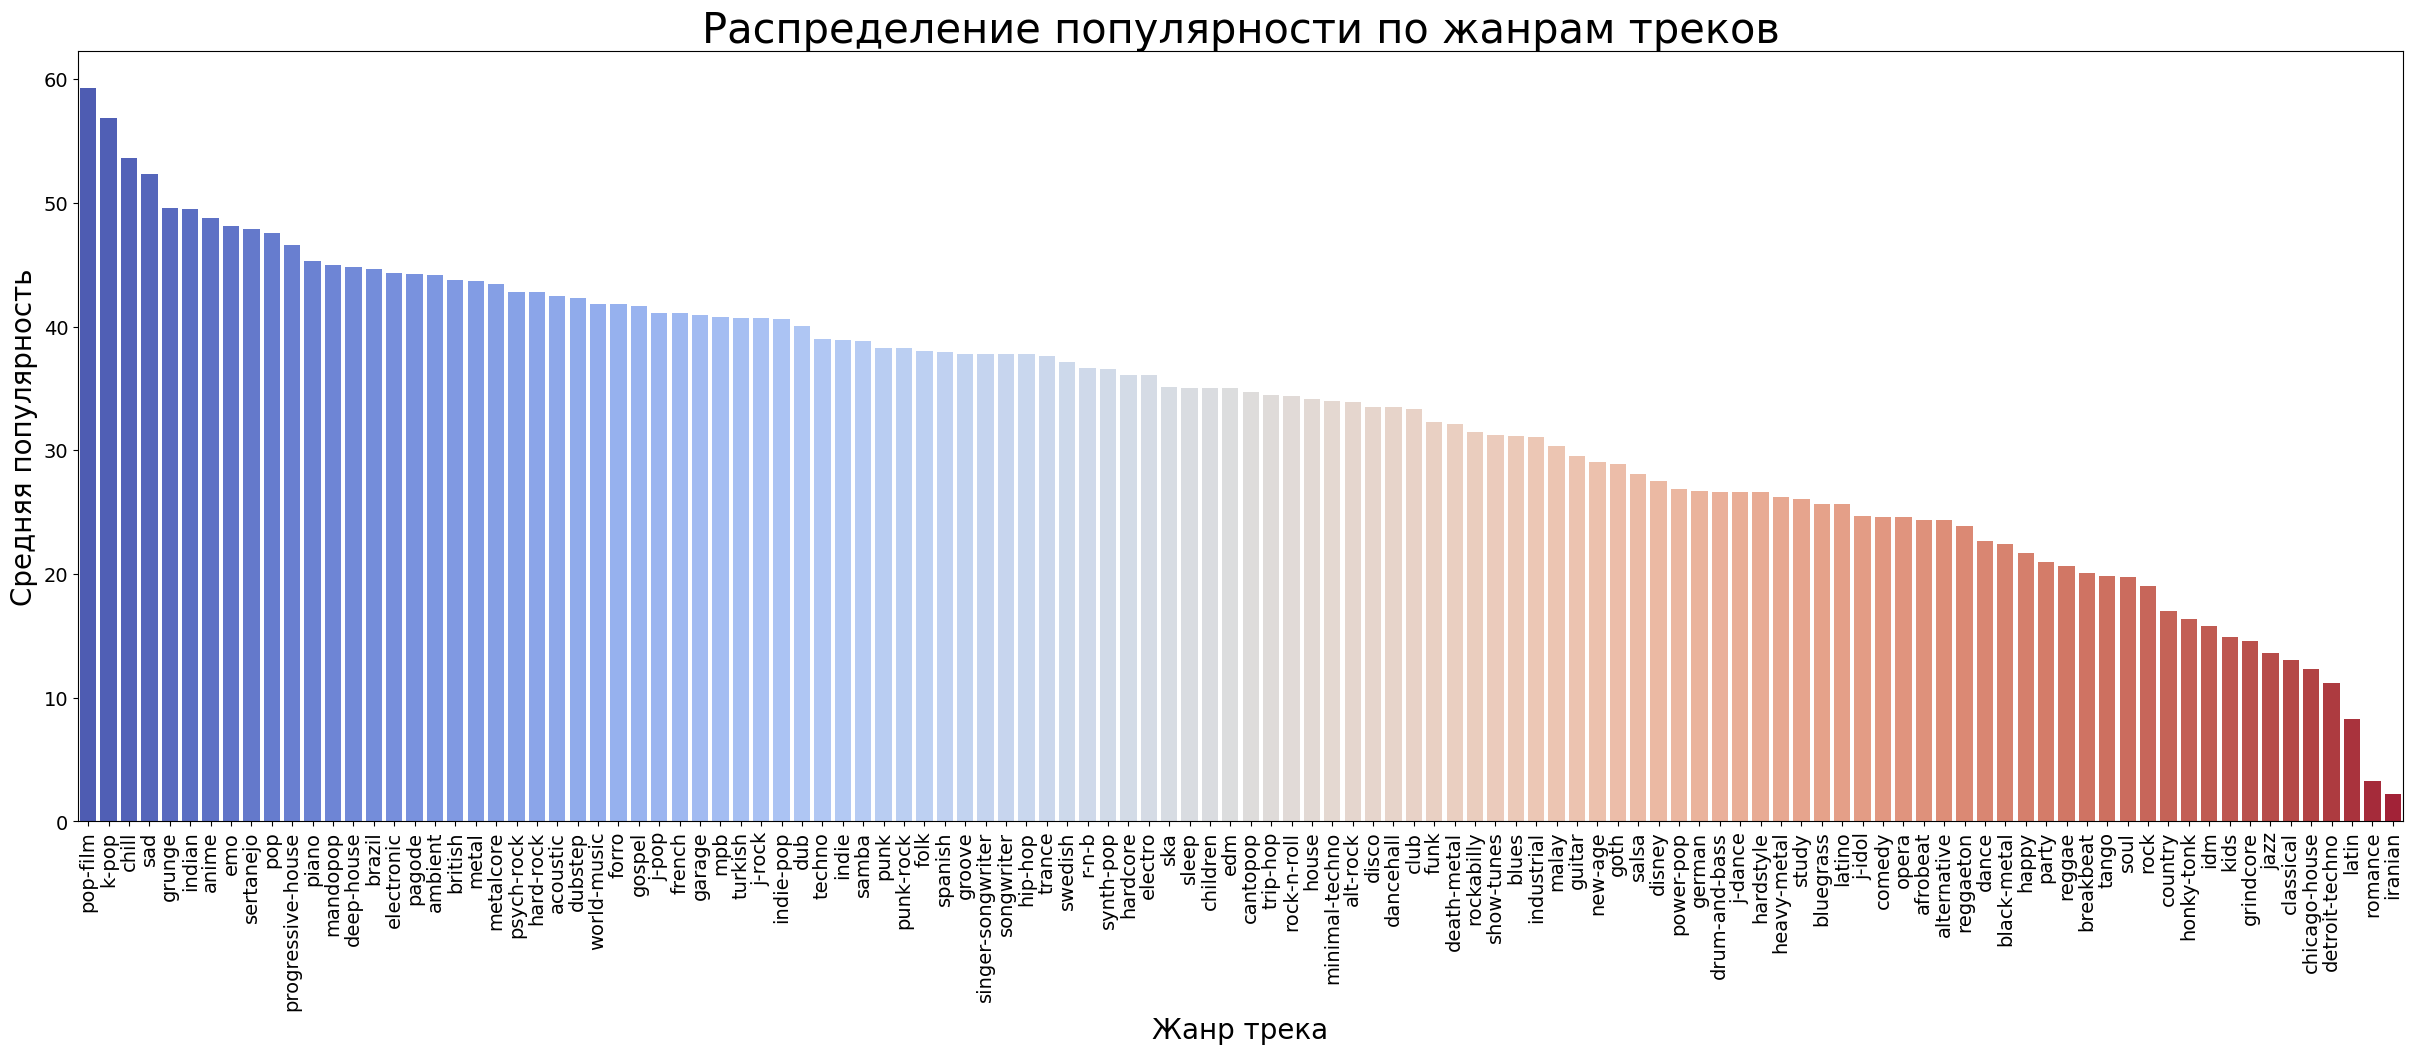

In [ ]:
# Средняя популярность по жанрам
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(30, 10))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='coolwarm')
plt.title('Распределение популярности по жанрам треков', fontsize=30)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Жанр трека', fontsize=20)
plt.ylabel('Средняя популярность', fontsize=20)
plt.show()

> Наблюдения:

По графику прекрасно видно, какие жанры наиболее популярны на момент ссбора датасета, можно выделить pop film, k-pop, chill и sad. Заметим множество жанров в правой части графика с низкими значениями популярности. Самые непопулярные жанры: iranian и romance.

> Выводы:

 С уверенностью можно сказать, что жанр сильно влияет на популярность песни. Это говорит о тенденциях в музыкальной индустрии и предпочтениях широкой аудитории. Эти жанры могут быть более успешными или стать хитами на музыкальных площадках. Это нормальная ситуация, т.к. всегда некоторые жанры преобладают, а другие имеют ограниченное количество поклонников.

**6. Посмотрим на влияние нецензурной лексики (explicit) на популярность (popularity).**

> Мне кажется, что сильной зависимости быть не должно, но это мое непрофессиональное мнение, т.к. я не слежу за тенденциями в музыке, а тем более за предпочтениями людей по музыке. Поэтому предлагаю проверить.

<ipython-input-13-03c385e2d0a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='coolwarm')


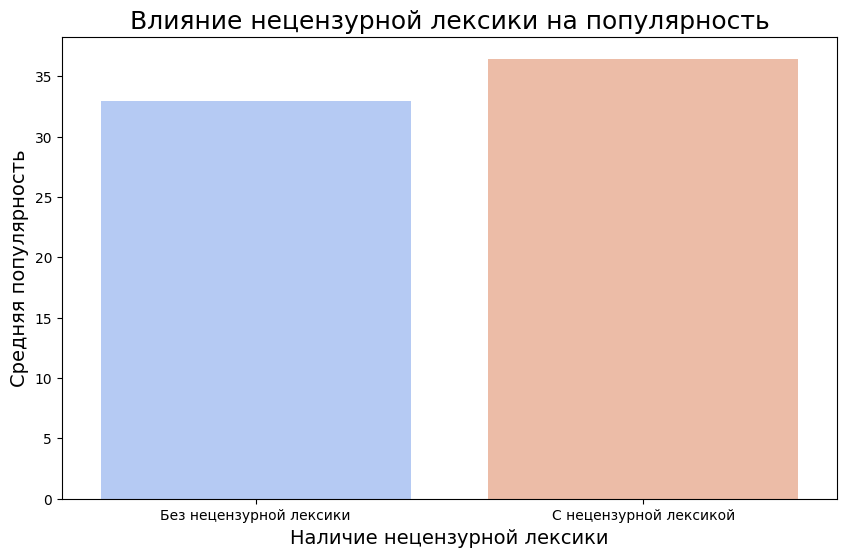

In [ ]:
plt.figure(figsize=(10, 6))
explicit_popularity = df.groupby('explicit')['popularity'].mean()
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='coolwarm')
plt.title('Влияние нецензурной лексики на популярность', fontsize=18)
plt.xlabel('Наличие нецензурной лексики', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks([0, 1], ['Без нецензурной лексики', 'С нецензурной лексикой'])
plt.show()

> Наблюдения:

Треки с нецензурной лексикой имеют популярность (≈36), а с цензурной (≈33)

> Выводы:

 Популярность нецензурных треков выше, что говорит об определённых предпочтениях слушателей. Однако разница небольшая, поэтому можно сказать, что наличие нецензурной лексики практически не оказывает влияния на популярность трека, это не ключевой фактор популярности.

**7. Посмотрим, как влияет громкость трека (loudness) на его популярность (popularity).**

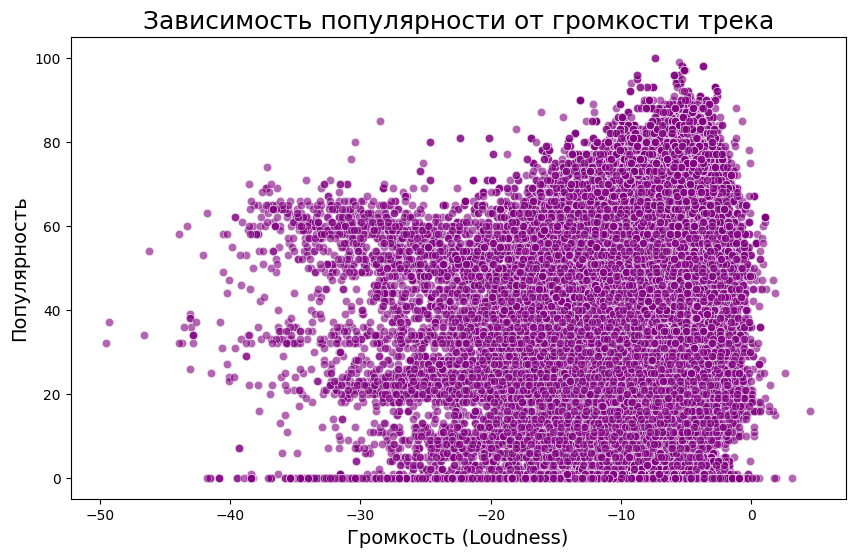

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=df, color='purple', alpha=0.6)
plt.title('Зависимость популярности от громкости трека', fontsize=18)
plt.xlabel('Громкость (Loudness)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.show()

> Наблюдения:

Видно, что популярность распределена по всему диапазону громкости, без явной корреляции. Большинство треков имеют громкость в диапазоне (-20 дб до -5 дб). Но тем не менее, популярность треков распределена хаотично в пределах этих значений громкости.

> Выводы:

 Делаем вывод, что громкость трека не оказывает сильного влияния на его популярность. А значит это не ключевой фактор.


8. Зависимость популярности (popularity) от разговорности трека (speechiness)

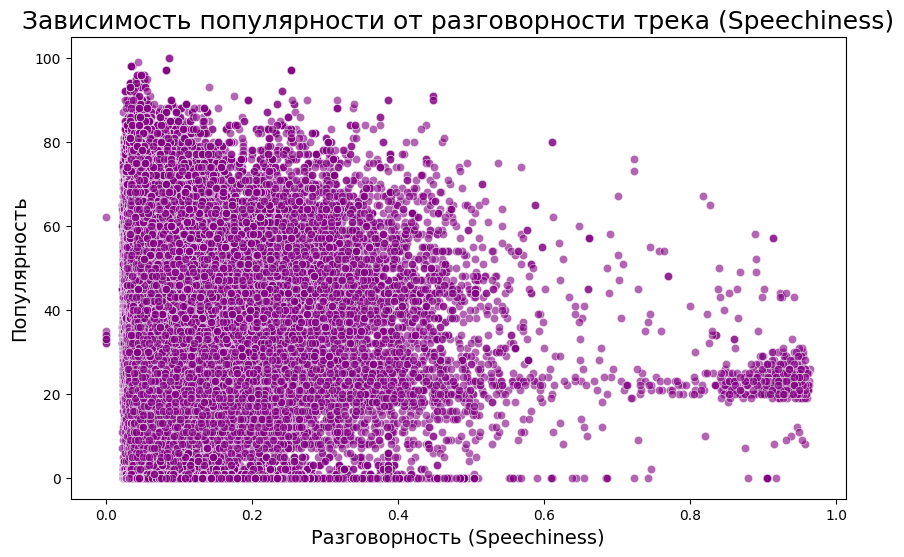

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speechiness', y='popularity', data=df, color='purple', alpha=0.6)
plt.title('Зависимость популярности от разговорности трека (Speechiness)', fontsize=18)
plt.xlabel('Разговорность (Speechiness)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.show()

> Наблюдения:

Видно, что наибольшая популярность треков с низкими значениями speechiness (от 0 до 0.1). Треки с высокими значениями speechiness (больше 0.5) имеют низкую популярность.

> Выводы:

 Делаем вывод, что высокие значения speechiness оказывают негативное влияние на популярность треков. Это может быть связано с предпочтением слушателей к трекам с меньшей речевой составляющей.

**9. Зависимость популярности (popularity) от громкость трека (loudness)**

<ipython-input-21-268b1e60bced>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loudness_popularity = df.groupby('loudness_category')['popularity'].mean().reset_index()
<ipython-input-21-268b1e60bced>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loudness_popularity, x='loudness_category', y='popularity', palette='coolwarm')


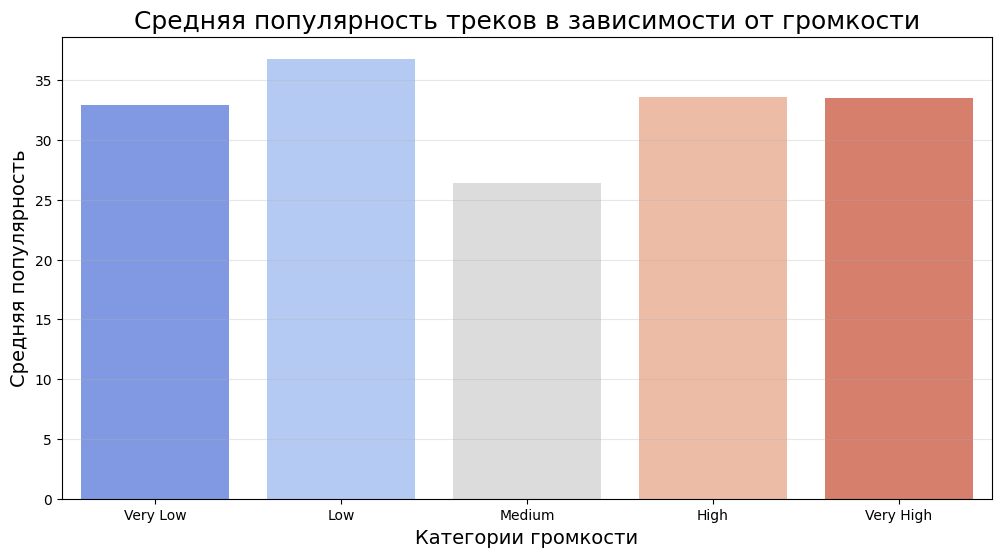

In [ ]:
df['loudness_category'] = pd.cut(df['loudness'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Средняя популярность для каждой категории громкости
loudness_popularity = df.groupby('loudness_category')['popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=loudness_popularity, x='loudness_category', y='popularity', palette='coolwarm')
plt.title('Средняя популярность треков в зависимости от громкости', fontsize=18)
plt.xlabel('Категории громкости', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()

> Наблюдения:

Опять же, видим незначительную связь. Но довольно странно, что средняя громкость имеет самую низкую популярность. А самую высокую громкость уровня low.

> Выводы:

 Громкость не является ключевым фактором, влияющим на популярность, но ее можно исползовать для создания признака с energy.

**10. Зависимость популярности (popularity) от лада трека, то есть мажор/минор (mode)**

<ipython-input-93-f2d9ff3fe78e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_popularity.index, y=mode_popularity.values, palette='viridis')


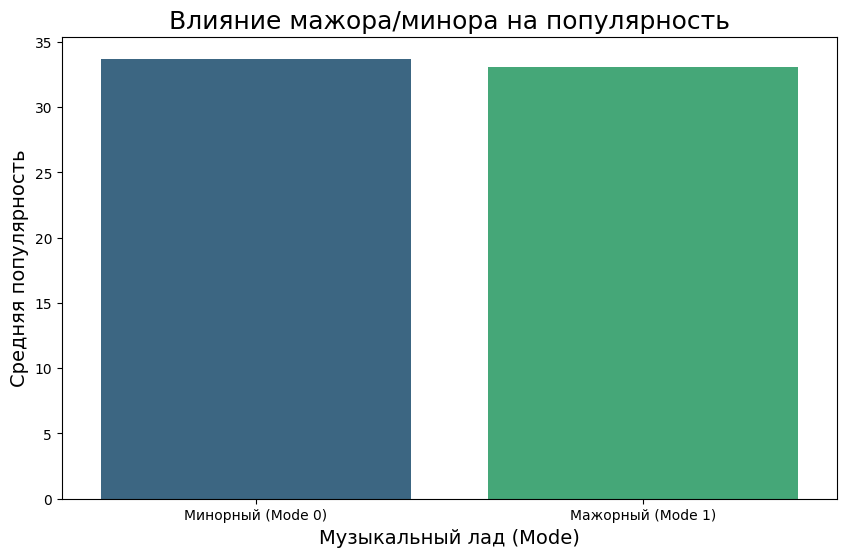

In [93]:
plt.figure(figsize=(10, 6))
mode_popularity = df.groupby('mode')['popularity'].mean()
sns.barplot(x=mode_popularity.index, y=mode_popularity.values, palette='viridis')
plt.title('Влияние мажора/минора на популярность', fontsize=18)
plt.xlabel('Музыкальный лад (Mode)', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks([0, 1], ['Минорный (Mode 0)', 'Мажорный (Mode 1)'])
plt.show()

> Наблюдения:

Здесь наблюдаем схожую ситуацию, как и с зависимостью популярности от ненормативной лексики в треках. Значения популярности практически одинаковые.

> Выводы:

 Делаем вывод, что что мажорность/минорность трека не влияет на его популярность.

Теперь предлагаю построить корреляционную матрицу и проанализировать взаимосвязи между такими параметрами, как: danceability, energy, loudness, speechiness, duration_ms, acousticness, instrumentalness, liveness, valence, tempo. Одним словом выявляем взаимосвязи между музыкальными характеристиками.

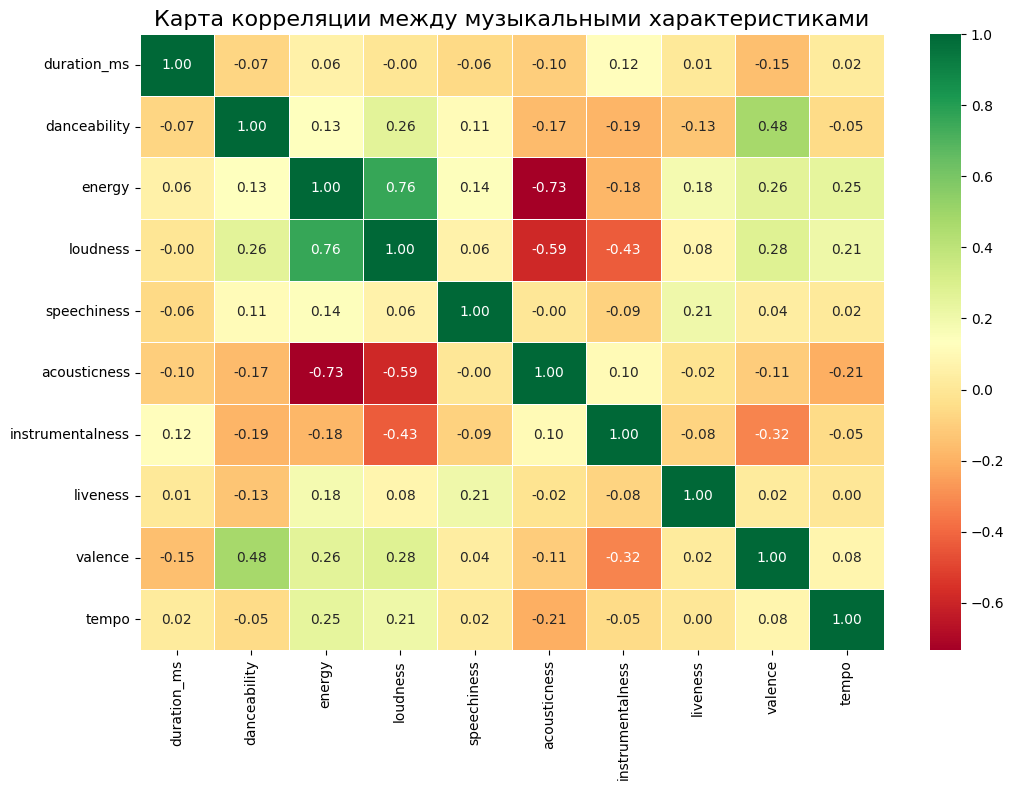

In [ ]:
# Числовые переменные
numeric_cols = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df_numeric = df[numeric_cols]
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Карта корреляции между музыкальными характеристиками', fontsize=16)
plt.show()

Судя по матрице, можно увидеть, что у нас есть сильная, слабая корреляция, отрицательная, а также почти отсутствие корреляции между музыкальными характеристиками, подробно зафиксируем самые важные наблюдения.

**Анализ корреляционной матрицы:**

> Сильная корреляция:

1.   energy и loudness (0.76). Треки с большей энергией, как правило, громче. Это логично, так как громкость и интенсивность звучания связаны с восприятием энергии.

> Умеренная корреляция:

1.   danceability и valence (0.48). Треки с более высоким уровнем танцевальности обычно имеют позитивное настроение, что может быть связано с их жизнерадостным звучанием.

> Слабая или отрицательная корреляция:

1.   danceability и loudness (0.26). Это можеь говорить о том, что танцевальные треки лишь немного громче других треков.
2.   acousticness и energy (-0.73). Аккустические треки намного чаще менее энергичны, что объясняется их более мягкой природой создания, ведь в большинстве случаев это живой звук инструментов.
3.   acousticness и loudness (-0.53). Это еще раз говорит о том, что аккустическая музыка мягкая и живая, а значит менее громкая.
4.   tempo и energy (0.25). Как видим, зависимость хоть и слабая, но присутствует, что на практике довольно понятно, ведь чем выше темп, тем музыка должна быть динамичнее, а значит восприниматься людьми, как более энергичная.

> Практически отсутствует корреляция:

1.   tempo с valence, liveness, instrumentalness, speechiness, duration_ms, danceability (много корреляций около 0). Это может указывать на то, что темп не сильно влияет на другие свойства трека.
2.   speechiness и valence (0.04). Что логично, ведь речь и настроение трека практически не имеют связи.









**Вывод:**

> Энергия и громкость, танцевальность и эмоциональность, являются ключевыми характеристиками, которые имеют заметные взаимосвязи.


> Связь между energy и loudness подчеркивает их схожую природу, что можно учитывать при создании признаков для модели.

# Feature Engineering

Создадим новые признаки на основе проделанного анализа

**1. Взаимосвязь energy и loudness**

In [ ]:
df['energy_to_loudness'] = df['energy'] / (df['loudness'] + 1e-5)



> Отношение энергии трека к его громкости. Этот признак может показывать, насколько эффективно энергия трека распределяется через громкость





**2. Среднее значение danceability и valence**



In [ ]:
df['dance_valence_mean'] = (df['danceability'] + df['valence']) / 2



> Среднее значение танцевальности и валентности. Указывает на общую "позитивность" и "танцевальность" трека, что может быть связано с его восприятием слушателями.





**3. Взаимосвязь acousticness и instrumentalness**



In [ ]:
df['acoustic_instrumental'] = df['acousticness'] * df['instrumentalness']



> Произведение акустичности и инструментальности. Оно оказывает, насколько трек одновременно акустический и инструментальный, что может быть полезно для анализа менее вокальных треков.



**4. Взаимосвязь energy и valence**

In [ ]:
df['energy_to_valence'] = df['energy'] / (df['valence'] + 1e-5)



> Отношение энергии к валентности. Помогает понять, как энергичность трека соотносится с его эмоциональной окраской (позитивностью).




**5. Взаимосвязь speechiness и instrumentalness**

In [ ]:
df['speech_to_instrument'] = df['speechiness'] / (df['instrumentalness'] + 1e-5)



> Отношение речевости к инструментальности. Указывает на преобладание речевых или инструментальных элементов в треке.



**6. Категория энергичности**

In [ ]:
df['energy_category'] = pd.cut(df['energy'], bins=3, labels=['Low', 'Medium', 'High'])



> Энергичность трека разделяем на категории (Low, Medium, High), что упрощает анализ, группируя треки по уровню их энергии.



**7. Категория танцевальности**

In [ ]:
df['danceability_category'] = pd.cut(df['danceability'], bins=3, labels=['Low', 'Medium', 'High'])



> Тацневальность разделяем на (Low, Medium, High). Категория группирует треки по уровню их танцевальной привлекательности.



**8. Категория продолжительности**

In [ ]:
df['duration_category'] = pd.cut(df['duration_min'], bins=[0, 3, 5, df['duration_min'].max()], labels=['Short', 'Medium', 'Long'])



> Длительность разделяем на (Short, Medium, Long). Полезно для анализа зависимости популярности от длины трека.



# Предобработка и подготовка данных

На этапе первичного анализа мы выявили по одному пропуску в столбцах: artists, album_name и track_name

In [ ]:
print("\nКоличество пропусков:")
print(df.isnull().sum())


Количество пропусков:
artists                  1
album_name               1
track_name               1
popularity               0
duration_ms              0
explicit                 0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
track_genre              0
danceability_category    0
duration_min             0
duration_category        1
loudness_category        0
energy_to_loudness       0
dance_valence_mean       0
acoustic_instrumental    0
energy_to_valence        0
speech_to_instrument     0
energy_category          0
dtype: int64


Удалим пропуски в этих столбцах

Также видим 1 пропуск в созданной категории duration_category, также удалим его

In [ ]:
df = df.dropna(subset=['artists', 'album_name', 'track_name','duration_category'])
print(df.isnull().sum())

artists                  0
album_name               0
track_name               0
popularity               0
duration_ms              0
explicit                 0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
track_genre              0
danceability_category    0
duration_min             0
duration_category        0
loudness_category        0
energy_to_loudness       0
dance_valence_mean       0
acoustic_instrumental    0
energy_to_valence        0
speech_to_instrument     0
energy_category          0
dtype: int64


**Логарифм длительности**


> Добавим логарифм длительности, который позволяет уменьшить влияние длинных треков, которые могут быть выбросами




In [ ]:
df['log_duration'] = np.log1p(df['duration_ms'])

**Нормализация громкости**

> Приводим к диапазону (от 0 до 1). С помощью неё мы убираем эффект масштаба.



In [ ]:
df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())

**Преобразуем длительность в минуты**

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000

**Числовые и категориальные признаки**

In [ ]:
numerical_features = ['duration_ms', 'danceability', 'energy', 'loudness_normalized', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                      'energy_to_loudness', 'dance_valence_mean', 'acoustic_instrumental', 'log_duration',
                      'speech_to_instrument', 'energy_to_valence']

categorical_features = ['duration_category', 'danceability_category', 'energy_category']

**Преобразуем числовые признаки в категориальные**


> Сделаем это с помощью LabelEncoder



In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_features:
    df[column] = label_encoder.fit_transform(df[column])

**Создадим список наших признаков**

In [ ]:
features = numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]

print("Выбранные признаки модели:")
for i, feature in enumerate(features, 1):
    print(f"{i}. {feature}")

Выбранные признаки модели:
1. duration_ms
2. danceability
3. energy
4. loudness_normalized
5. speechiness
6. acousticness
7. instrumentalness
8. liveness
9. valence
10. tempo
11. energy_to_loudness
12. dance_valence_mean
13. acoustic_instrumental
14. log_duration
15. speech_to_instrument
16. energy_to_valence
17. danceability_category
18. duration_category
19. energy_category


**Разделяем данные на обучающую и тестовую выборки**

In [ ]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Сделаем нормализацию данных**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Importances

На этом этапе посмотрим корреляцию новый признаков с нашим таргетом

In [ ]:
# Фильтруем только числовые столбцы
numerical_df = df.select_dtypes(include=[np.number])

# Рассчитываем корреляции
correlations = numerical_df.corr()["popularity"].sort_values(ascending=False)
print("\nКорреляции признаков с популярностью:")
print(correlations)


Корреляции признаков с популярностью:
popularity               1.000000
loudness_normalized      0.050420
loudness                 0.050420
energy_category          0.044996
danceability             0.035444
danceability_category    0.031865
time_signature           0.031076
log_duration             0.026833
tempo                    0.013212
energy_to_valence        0.003129
energy_to_loudness       0.002193
energy                   0.001053
key                     -0.003847
liveness                -0.005397
duration_min            -0.007129
duration_ms             -0.007129
dance_valence_mean      -0.011627
speech_to_instrument    -0.012395
mode                    -0.013948
duration_category       -0.015370
acousticness            -0.025458
valence                 -0.040522
acoustic_instrumental   -0.041296
speechiness             -0.044930
instrumentalness        -0.095147
Name: popularity, dtype: float64


**Вывод:**

Несмотря на то, что значения корреляции небольшие, такие признаки, как loudness_normalized (0.05) и danceability (0.035), всё же показывают положительную связь с популярностью, что указывает на их потенциальную значимость.
Отрицательные корреляции (например, instrumentalness -0.095) также могут быть важны, так как они дают дополнительную информацию для модели.

Теперь оценим важность признаков

In [ ]:
# Добавляем признаки и целевую переменную
X = df[[
    'duration_ms', 'danceability', 'energy', 'loudness_normalized',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'energy_to_valence', 'dance_valence_mean', 'acoustic_instrumental', 'log_duration',
    'speech_to_instrument', 'energy_category', 'danceability_category', 'duration_category'
]]
y = df['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Получение важности признаков
feature_importances = model_dt.feature_importances_
features = X.columns

importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(importance_df)


Feature Importances:
                  Feature  Importance
9                   tempo    0.096322
5            acousticness    0.092259
3     loudness_normalized    0.081302
1            danceability    0.080691
7                liveness    0.076211
4             speechiness    0.074239
2                  energy    0.073061
11     dance_valence_mean    0.072087
10      energy_to_valence    0.061078
8                 valence    0.057841
14   speech_to_instrument    0.056461
13           log_duration    0.053774
0             duration_ms    0.050242
6        instrumentalness    0.041392
12  acoustic_instrumental    0.028009
16  danceability_category    0.002165
15        energy_category    0.002080
17      duration_category    0.000788


Визуализируем полученные значения

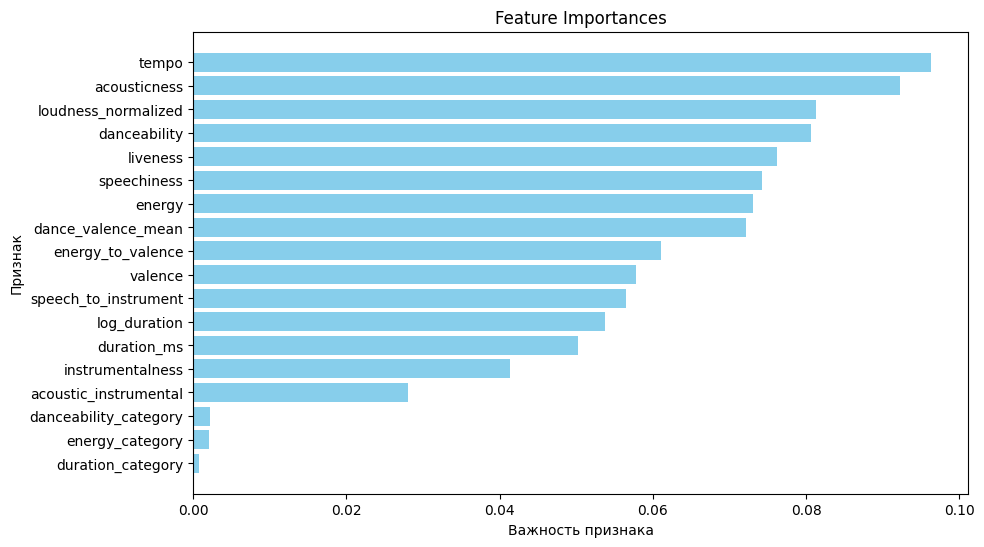

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Feature Importances')
plt.show()

**Вывод:**

Наиболее важные признаки:
1. Наибольшее значение важности признака tempo указывает на то, что ритм трека имеет сильное влияние на популярность.
2. Как видим, признак acousticness важен для треков с акустическими элементами.
3. loudness_normalized - наша нормализованная громкость трека, как мы вилим, также является ключевым фактором.

Признаки, такие как duration_category и energy_category, имеют низкую важность, но могут быть полезны для интерпретации.

# Эксперименты с моделями

Для начала дадим определение нашим метрикам

**1. MAE** (Mean Absolute Error) - это средняя абсолютная ошибка, которая измеряет среднюю величину ошибок между предсказанными и фактическими значениями.


**2. MSE** (Mean Squared Error) - это средняя квадратичная ошибка, которая измеряет среднюю квадратичную разницу между предсказанными и фактическими значениями.


**3. RMSE** (Root Mean Squared Error) - это корень из средней квадратичной ошибки, который позволяет вернуть измерение ошибки в исходные единицы.


**4. MAPE** (Mean Absolute Percentage Error) - это средняя абсолютная процентная ошибка, которая измеряет точность предсказаний в процентном выражении.


**5. R²** (Coefficient of Determination) - это коэффициент детерминации, который показывает, какую долю дисперсии зависимой переменной можно объяснить независимыми переменными (чем ближе к 1, тем лучше).

**1. Простая модель Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

# Предсказания и метрики
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nМетрики простой модели Random Forest:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MAPE: {mape_rf}")
print(f"R2: {r2_rf}")


Метрики простой модели Random Forest:
MAE: 17.94025200330135
MSE: 466.8893598410489
RMSE: 21.607622725349703
MAPE: 2.1016858436116012e+16
R2: 0.061784532662826464


**Наблюдения:**

MAE ≈ 17.94. Это указывает, что модель в среднем ошибается на 17.94 единицы при прогнозировании популярности треков.
Это значение достаточно большое, что указывает на ограничения модели Random Forest в данной задаче.

MSE (466.89) и её корень RMSE (21.61) подтверждают наличие значительных отклонений от истинных значений. Ошибки показывают, что модель недостаточно точна.

MAPE - Аномально высокое значение, которое может быть связано с делением на малые или нулевые значения популярности.

R² ≈ 0.06 указывает, что модель объясняет только 6% дисперсии целевой переменной. Это низкий показатель, который говорит о слабой предсказательной способности Random Forest в текущей конфигурации.

**Вывод:**

Модель Random Forest с текущими параметрами (глубина 5, 100 деревьев) не смогла эффективно решить задачу предсказания популярности. Это связано с ограниченной способностью модели улавливать сложные нелинейные зависимости в данных.



Попробуем увеличить n_estimators и max_depth

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Предсказания и метрики
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nРезультаты:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MAPE: {mape_rf}")
print(f"R2: {r2_rf}")


Метрики простой модели Random Forest:
MAE: 16.648413024035822
MSE: 416.5771490732217
RMSE: 20.410221681138637
MAPE: 1.8790804794443096e+16
R2: 0.16288706015322318


**Вывод:**

Улучшение параметров модели довольно положительно сказалось на её производительности:

Эта модель Random Forest теперь лучше подходит для задачи предсказания популярности.

**Для дальнейшего улучшения можно:**

Провести гиперпараметрическую оптимизацию с использованием GridSearchCV или RandomizedSearchCV.
Углубить анализ выбросов и предобработки данных для устранения влияния аномально высоких значений MAPE.

**2. Линейная регрессия**

Рассчет метрик сделал через функцию и сделал код более структурированным

In [ ]:
# Создание модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2

mae, mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

metrics = {
    "MAE": f"{mae}",
    "MSE": f"{mse}",
    "RMSE": f"{rmse}",
    "MAPE": f"{mape}",
    "R2": f"{r2}"
}

print("\nРезультаты:")
for metric, value in metrics.items():
  print(f"{metric}: {value}")


Результаты:
MAE: 18.313355977659203
MSE: 483.2053398574492
RMSE: 21.981932122937902
MAPE: 2.1722446453810944e+16
R2: 0.028997525434042104


**Наблюдения:**

MAE: Средняя абсолютная ошибка показывает, что модель в среднем ошибается примерно на 18 единиц в предсказании популярности. Это достаточно высокая ошибка для целевой переменной, если учитывать её диапазон.

MSE и RMSE: Судя по значениям (≈483) и (≈22) модель имеет значительные отклонения от истинных значений.

MAPE: Мы видим аномально высокое значение этой метрики, что указывает на проблемы с делением на нули или малые значения в данных. Это делает её интерпретацию некорректной и требует дополнительной проверки.

R²: Очень низкий коэффициент детерминации (≈0.03) свидетельствует об очень слабой линейной связи между признаками и популярностью. Модель объясняет лишь небольшую часть дисперсии целевой переменной.

**Вывод:**

Можно сделать вывод о том, что линейная регрессия мало эффективна для данной задачи. Это может быть связано с тем, что наша целевая переменная зависит от более сложных нелинейных факторов или взаимодействий между признаками.

Попробую использовать StandardScaler для стандартизации данных

In [ ]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Предсказание
y_pred_lr = model_lr.predict(X_test_scaled)

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2

mae_lr, mse_lr, rmse_lr, mape_lr, r2_lr = calculate_metrics(y_test, y_pred_lr)

metrics = {
    "MAE": f"{mae_lr}",
    "MSE": f"{mse_lr}",
    "RMSE": f"{rmse_lr}",
    "MAPE": f"{mape_lr}",
    "R2": f"{r2_lr}"
}

print("\nРезультаты:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Результаты модели Линейной регрессии после масштабирования:
MAE: 18.31333565883434
MSE: 483.2053078369735
RMSE: 21.981931394601645
MAPE: 2.172240000632375e+16
R2: 0.028997589779277022


Стандартизация данных никак не улучшила результаты

Попробую добавить полиномиальные признаки (второй степени)

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Добавление полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Создание модели
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Предсказание
y_pred_poly = model_poly.predict(X_test_poly)

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2

mae_poly, mse_poly, rmse_poly, mape_poly, r2_poly = calculate_metrics(y_test, y_pred_poly)

metrics = {
    "MAE": f"{mae_poly}",
    "MSE": f"{mse_poly}",
    "RMSE": f"{rmse_poly}",
    "MAPE": f"{mape_poly}",
    "R2": f"{r2_poly}"
}

print("\nРезультаты:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Результаты модели Линейной регрессии с полиномиальными признаками:
MAE: 17.63144235985076
MSE: 477.06985327314374
RMSE: 21.841928790130776
MAPE: 2.084749526968621e+16
R2: 0.04132680279216139


Хоть и результаты стали лучше, но это все равно небольшое изменение. Поэтому не будем выбирать модель линейной регрессии в качестве основной.

**3. Дерево решений**

In [ ]:
# Создание модели
decision_model = DecisionTreeRegressor(random_state=42)
decision_model.fit(X_train, y_train)

# Предсказание
y_pred = decision_model.predict(X_test)

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2

mae, mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

metrics = {
    "MAE": f"{mae}",
    "MSE": f"{mse}",
    "RMSE": f"{rmse}",
    "MAPE": f"{mape}",
    "R2": f"{r2}"
}

print("\nРезультаты:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Результаты:
MAE: 13.043167986360382
MSE: 425.8866348088478
RMSE: 20.637020977089882
MAPE: 5335106662057332.0
R2: 0.14417962267147633


**Наблюдения:**

MAE: Составляет примерно 13, что означает, что модель дерева решений в среднем ошибается на 13 единиц в предсказании популярности. Для текущей задачи это заметное отклонение, но не критическое.

MSE и RMSE: Значения ошибок составляют (≈426) и (≈20.6) соответственно. Это указывает на наличие значительных отклонений для отдельных наблюдений, что влияет на общую точность модели.

MAPE: Также наблюдаем высокое значение MAPE, которое указывает на серьезные проблемы в расчетах, что делает её непригодной для анализа в данном случае.

R²: Коэффициент детерминации равен 0.14, это уже намного лучше, чем у линейной регрессии, но предсказательная способность модели все же слабая.

**Вывод:**

Модель дерева решений показала уже лучшие результаты, чем у модели линейной регрессии. Но всё же, это не идеальный вариант для нашей работы.

Чтобы улучшить результаты, можно попробовать добавить гиперпараметры

max_depth=10

min_samples_split=5

min_samples_leaf=3

In [ ]:
# Добавление гиперпараметров
decision_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
decision_model.fit(X_train, y_train)

# Предсказание
y_pred = decision_model.predict(X_test)

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2

mae, mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

metrics = {
    "MAE": f"{mae}",
    "MSE": f"{mse}",
    "RMSE": f"{rmse}",
    "MAPE": f"{mape}",
    "R2": f"{r2}"
}

print("\nРезультаты:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Результаты:
MAE: 17.088425168665914
MSE: 448.0808684460516
RMSE: 21.16792073979047
MAPE: 1.8636359930518364e+16
R2: 0.09958024844026936


Результаты ухудшились, поэтому предлагаю сделать замену гиперпараметров на оптимальные с помощью GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Настройка модели и GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1
)

# Поиск лучших параметров
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

# Модель
decision_model = DecisionTreeRegressor(**best_params, random_state=42)
decision_model.fit(X_train, y_train)

# Предсказание
y_pred = decision_model.predict(X_test)

mae, mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

metrics = {
    "MAE": f"{mae:.2f}",
    "MSE": f"{mse:.2f}",
    "RMSE": f"{rmse:.2f}",
    "MAPE": f"{mape:.2%}",
    "R2": f"{r2:.2f}"
}

print("\nРезультаты модели дерева решений с оптимальными гиперпараметрами:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

Результаты модели дерева решений с оптимальными гиперпараметрами:
MAE: 14.16
MSE: 387.26
RMSE: 19.68
MAPE: 781032159899555328.00%
R2: 0.22


Улучшение гиперпараметров модели дерева решений привело к более точным и стабильным результатам. Снижение ошибок и увеличение коэффициента детерминации подтверждают, что оптимизация гиперпараметров была успешной.

**4. Градиентный бустинг**

In [ ]:
# Создание модели
boosting_model = GradientBoostingRegressor(random_state=42)
boosting_model.fit(X_train, y_train)

# Предсказание
y_pred = boosting_model.predict(X_test)

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2

mae, mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

metrics = {
    "MAE": f"{mae}",
    "MSE": f"{mse}",
    "RMSE": f"{rmse}",
    "MAPE": f"{mape}",
    "R2": f"{r2}"
}

print("\nРезультаты:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Результаты:
MAE: 17.520075526475257
MSE: 452.82025156266985
RMSE: 21.279573575677446
MAPE: 2.0621181520253196e+16
R2: 0.0900564448839799


Не ожидал, что будет такое маленькое значение коэффициента детерминации у модели градиентного бустинга. Поэтому я хочу улучшить модель на этом этапе, чтобы убедиться, что мои созданные признаки доброкачественные и имеют значение для нашей работы.

Я предлагаю добавить гиперпараметры

1. n_estimators=500: Увеличил количество деревьев.

2. learning_rate=0.05: Это уменьшит скорость обучения и сделает обучение более стабильным.

3. max_depth=5: Увеличил глубину дерева, чтобы модель могла лучше учитывать сложные зависимости между признаками.

4. subsample=0.8: Добавил выборку 80% данных для каждого дерева, что должно уменьшить переобучение.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Оптимизированная модель
boosting_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

boosting_model.fit(X_train, y_train)

y_pred = boosting_model.predict(X_test)

# Функция для расчета метрик
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2

mae, mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

metrics = {
    "MAE": f"{mae}",
    "MSE": f"{mse}",
    "RMSE": f"{rmse}",
    "MAPE": f"{mape}",
    "R2": f"{r2}"
}

print("\nРезультаты:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Результаты:
MAE: 16.10071282394702
MSE: 392.84315112986894
RMSE: 19.820271217364027
MAPE: 1.7698903123018148e+16
R2: 0.2105805950407672


Добавление гиперпараметров, в отличие от дерева решений и линейной регрессии дало значительное улучшение

**Наблюдения:**

MAE: Средняя абсолютная ошибка составляет примерно 16. Это значение чуть ниже, чем у линейной регрессии, но все еще значительное.

MSE и RMSE: Значения составляют (≈393) и (≈19.8) соответственно. Отклонения от истинных значений меньше, чем в других моделях, что свидетельствует о её лучшей точности.

MAPE: Аномально высокое значение MAPE, которое снова указывает на проблемы в расчёте.

R²: Коэффициент детерминации равен 0.21, что значительно лучше по сравнению с линейной регрессией и деревом решений.

**Вывод:**

Оптимизированная модель Gradient Boosting значительно улучшила качество предсказаний. Это показывает, что детальная настройка гиперпараметров помогает повысить производительность, особенно на сложных данных.
Модель градиентного бустинга показывает лучшие результаты среди всех протестированных моделей, особенно по R² и RMSE. Однако значение MAPE требует внимания из-за возможных проблем в данных.

**5. Нейронная сеть**

Модель будет состоять из нескольких слоев с функцией активации ReLU, и выходной слой с сигмоидной активацией для предсказания вероятности

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Нормализация данных для нейронной сети
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Обучение модели
history = model_nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Оценка модели
nn_predictions = model_nn.predict(X_test_scaled)
mae_nn, mse_nn, rmse_nn, mape_nn, r2_nn = calculate_metrics(y_test, nn_predictions.flatten())

metrics_nn = {
    "MAE": f"{mae_nn:.2f}",
    "MSE": f"{mse_nn:.2f}",
    "RMSE": f"{rmse_nn:.2f}",
    "MAPE": f"{mape_nn:.2%}",
    "R2": f"{r2_nn:.2f}"
}

print("\nРезультаты модели нейронной сети:")
for metric, value in metrics_nn.items():
    print(f"{metric}: {value}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1534.8861 - mae: 32.4888 - val_loss: 1550.2322 - val_mae: 32.6989
Epoch 2/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1537.5002 - mae: 32.5092 - val_loss: 1550.2322 - val_mae: 32.6989
Epoch 3/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1542.4194 - mae: 32.6219 - val_loss: 1550.2322 - val_mae: 32.6989
Epoch 4/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1536.7949 - mae: 32.5250 - val_loss: 1550.2322 - val_mae: 32.6989
Epoch 5/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1532.9805 - mae: 32.4867 - val_loss: 1550.2322 - val_mae: 32.6989
Epoch 6/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1537.4790 - mae: 32.5385 - val_loss: 1550.2322 - val_mae: 32.6989
Epoch 7/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1534.9419 - mae: 32.5269 - val_loss: 1550.2322 - val_mae: 32.6989
Epoch 8/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1537.5813 - mae: 32.5431 - val_loss: 155

Наблюдения:

MAE: Значение MAE = 32.34 указывает на большую среднюю ошибку в предсказаниях. Это говорит о том, что модель не может точно прогнозировать популярность.

MSE и RMSE: Также очень велики, что подтверждает значительные отклонения между реальными и предсказанными значениями

MAPE: Снова аномально высокое значение, которое свидетельствует о наличии выбросов или проблем с распределением данных. Возможно, в целевой переменной есть нулевые значения, которые вызывают ошибки при расчёте.

R²: Отрицательное значение −2.06 указывает на то, что модель хуже, чем простая модель, которая бы предсказывала среднее значение целевой переменной для всех наблюдений.

Вывод:

Очевидно, есть проблемы, вощможно сложность модели может не соответствовать сложности задачи. Возможно, нейронная сеть переобучается из-за слишком большого количества параметров.
Слишком много слоев или слишком большой размер слоев также могут привести к переобучению на данных.

Попробую улучшить модель нейронной сети и внесу следующие изменения:

1. Уменьшу количество нейронов и добавлю больше dropout для предотвращения переобучения.
2. Изменю функцию активации в выходном слое на linear, что лучше подходит для задачи регрессии.
3. Уменьшу скорость обучения до 0.0005, чтобы модель училась более стабильно.
4. Уменьшу количество эпох до 30 для ускорения обучения.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Нормализация данных для нейронной сети
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Компиляция модели
model_nn.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# Обучение модели
history = model_nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=30, batch_size=16, verbose=1)

# Оценка модели
nn_predictions = model_nn.predict(X_test_scaled)
mae_nn, mse_nn, rmse_nn, mape_nn, r2_nn = calculate_metrics(y_test, nn_predictions.flatten())

metrics_nn = {
    "MAE": f"{mae_nn}",
    "MSE": f"{mse_nn}",
    "RMSE": f"{rmse_nn}",
    "MAPE": f"{mape_nn}",
    "R2": f"{r2_nn}"
}

print("\nРезультаты модели нейронной сети:")
for metric, value in metrics_nn.items():
    print(f"{metric}: {value}")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4560/4560 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 663.8808 - mae: 20.9167 - val_loss: 476.0480 - val_mae: 18.0642
Epoch 2/30
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 489.8468 - mae: 18.2349 - val_loss: 473.5578 - val_mae: 18.0486
Epoch 3/30
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 486.9367 - mae: 18.1883 - val_loss: 473.1951 - val_mae: 17.9977
Epoch 4/30
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 483.5395 - mae: 18.1116 - val_loss: 467.8358 - val_mae: 17.7926
Epoch 5/30
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 478.2734 - mae: 17.9868 - val_loss: 466.1281 - val_mae: 17.8163
Epoch 6/30
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 478.4125 - mae: 18.0077 - val_loss: 464.8835 - val_mae: 17.7995
Epoch 7/30
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 468.9578 - mae: 17.7833 - val_loss: 461.1208 - val_mae: 17.6438
Epoch 8/30
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 470.4018 - mae: 17.8177 - val_loss: 462.6657 - val_mae: 17.

Вывод:

Модель нейронной сети была улучшена, но результаты всё ещё далеки от удовлетворительных:
Нейронная сеть всё ещё уступает по точности более простым алгоритмам, таким как градиентный бустинг.
Возможно, архитектура модели слишком сложна для текущего объёма и характеристик данных.

# Дерево решений

Самый лучший результат показало дерево решений

Сделаем кросс-валидацию на 5 фолдов, а также итоговый вывод

In [ ]:
from sklearn.model_selection import GridSearchCV

# Настройка параметров для дерева решений
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1
)

grid_search.fit(X_scaled, y)
best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

# Модель дерева решений с лучшими параметрами
decision_model = DecisionTreeRegressor(**best_params, random_state=42)

# Кросс-валидация с расчетом всех метрик
def evaluate_model(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {
        'MAE': make_scorer(mean_absolute_error),
        'MSE': make_scorer(mean_squared_error),
        'R2': make_scorer(r2_score),
        'MAPE': make_scorer(mean_absolute_percentage_error)
    }
    results_r2 = cross_val_score(model, X, y, cv=kfold, scoring=scoring['R2'], n_jobs=-1)
    results_mae = cross_val_score(model, X, y, cv=kfold, scoring=scoring['MAE'], n_jobs=-1)
    results_mse = cross_val_score(model, X, y, cv=kfold, scoring=scoring['MSE'], n_jobs=-1)
    results_mape = cross_val_score(model, X, y, cv=kfold, scoring=scoring['MAPE'], n_jobs=-1)

    # Вычисляем RMSE
    results_rmse = np.sqrt(results_mse)

    return {
        'R2 Mean': np.mean(results_r2),
        'R2 Std': np.std(results_r2),
        'MAE Mean': np.mean(results_mae),
        'MAE Std': np.std(results_mae),
        'MSE Mean': np.mean(results_mse),
        'MSE Std': np.std(results_mse),
        'RMSE Mean': np.mean(results_rmse),
        'RMSE Std': np.std(results_rmse),
        'MAPE Mean': np.mean(results_mape),
        'MAPE Std': np.std(results_mape)
    }

metrics = evaluate_model(decision_model, X_scaled, y)

# Итоговый вывод
print("\nРезультаты кросс-валидации для модели дерева решений:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Результаты кросс-валидации для модели дерева решений:
R2 Mean: 0.046737210814204164
R2 Std: 0.002829558742190575
MAE Mean: 18.027216279005277
MAE Std: 0.04426770921031423
MSE Mean: 474.2068951751438
MSE Std: 1.7406096479336362
RMSE Mean: 21.776255322405927
RMSE Std: 0.03999135570787547
MAPE Mean: 2.0440632804617412e+16
MAPE Std: 456064176944141.8


Наблюдения:

1. Среднее значение R² = 0.0467 указывает на то, что модель объясняет менее 5% дисперсии данных, что является низким результатом для регрессионной задачи.

2. Средняя абсолютная ошибка MAE = 18.03 свидетельствует о значительных отклонениях предсказанных значений от фактических.

3. Высокие значения MSE и RMSE подтверждают, что модель не справляется с точным прогнозированием.

4. Невероятно большое значение MAPE, связанное с делением на малые значения целевой переменной в некоторых наблюдениях, что затрудняет интерпретацию.

Вывод:

Модель дерева решений показала стабильные, но недостаточно высокие результаты на кросс-валидации.

# Итоговый вывод

**Положительные моменты:**

**Глубокий анализ данных:**

Были добавлены новые признаки (например, взаимодействия между музыкальными параметрами, логарифмическое преобразование, разделение параметров на категории), что улучшило качество данных для модели.
Проведена нормализация и обработка выбросов, что является важным шагом в подготовке данных.

**Разнообразие моделей:**

Я протестировал различные алгоритмы (линейная регрессия, дерево решений, градиентный бустинг, случайный лес, нейронная сеть), а также улучшил их и получил более хорошие результаты.

**Основная проблема:**

Результаты всех моделей, включая лучшие, остаются не самыми лучшими. Это может быть связано с качеством исходного датасета:


> Возможно, данные содержат шум, недостаточно выраженные зависимости между признаками и целевой переменной.

Ограниченностью признаков:

> Даже с добавлением новых признаков их информативность может быть недостаточной для точного прогнозирования.

Сложностью задачи:


> Популярность треков зависит от множества факторов (например, маркетинговых, социальных), которые не представлены в данных.



**В заключение хочу подытожить:**

Я проделал огромную работу по анализу данных, созданию признаков и тестированию различных подходов. Несмотря на ограниченные результаты, я постарался показать свои навыки, а также понимание процесса обработки данных и построения моделей машинного обучения.